# Лабораторная работа №1
Построить бифуркационную диаграмму и график зависимости показателя Ляпунова от параметра одномерного дискретного отображения $x_{n+1}=f(x_{n})=\frac{\sqrt{r}|x_{n}|}{\sqrt{x_{n}-2}}$ на интервале $r \in [0.5, 1]$. Для нескольких значений параметра из интервала, при которых отображение имеет качественно различную динамику, построить итерационную диаграмму отображения.

Для начала исследуем данную функцию. Ее область определения $(2, +\infty)$, поэтому модуль с числителя можно снять.

Найдем ее стационарные точки: $\frac{\sqrt{r}p}{\sqrt{p-2}}=p, \ p(\frac{\sqrt{r}}{\sqrt{p-2}}-1) = 0, \ p=r+2$

Итак мы имеем одну стационарную точку $p = r + 2$

Посчитаем теперь производную $f^{'}(x) = \sqrt{r}(\frac{1}{\sqrt{x-2}} -\frac{1}{2}\frac{x}{\sqrt{x-2}^3})$

Подставляя в производную выражение для стационарной точки получим $f^{'}(p) = \frac{1}{2}-\frac{1}{r}$

Модуль производной $|f^{'}(p)|$ монотонно убывает на интервале $r \in [0.5, 1]$ и становится равен 1 в точке $r= \frac{2}{3}$.  

Таким образом, можем заключить, что при $r \in [0.5, \frac{2}{3})$ стационарная точка является неусточивой, а при $r \in (\frac{2}{3}, 1]$ устойчивой.

Построим бифуркационную диаграмму

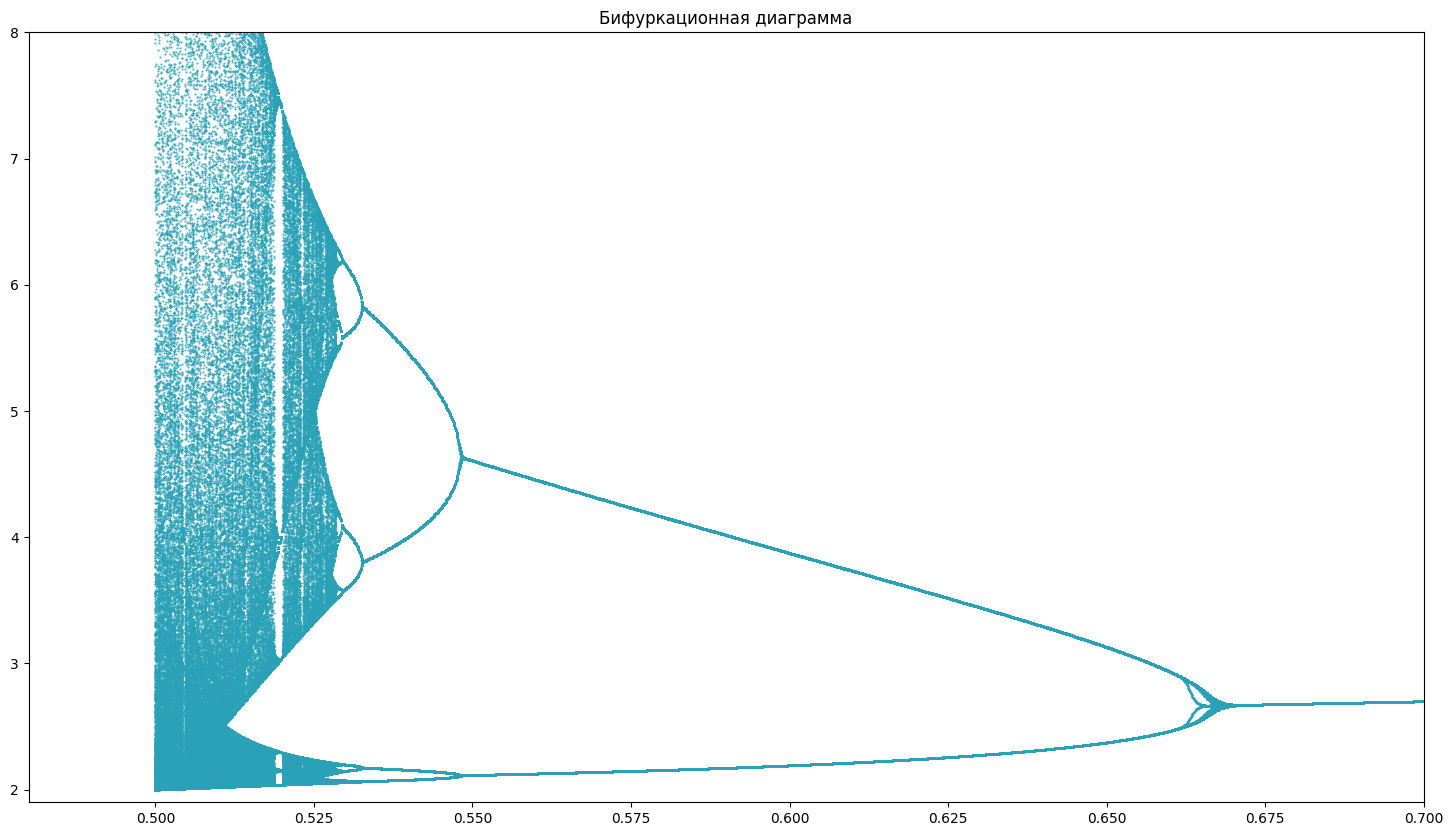

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, r):
  return r**0.5 * np.abs(x) / (x - 2) ** 0.5
n_x = 70
n_r = 4000
r = np.linspace(0.5, 1, n_r)
x = np.linspace(2.01, 20, n_x)
plt.figure(figsize=(18, 10))
plt.axis([0.48, 0.7, 1.9, 8])
for r in r:
  f_values = x
  for i in range(490):
    f_values = f(f_values, r)
  last_10_values = f_values
  for i in range(9):
    f_values = f(f_values, r)
    last_10_values = np.append(last_10_values, [f_values])

  plt.title('Бифуркационная диаграмма')
  plt.scatter([r]*(n_x*10), last_10_values, s=0.2, color='#2AA1B7')

Построим график зависимости показателя Ляпунова от параметра

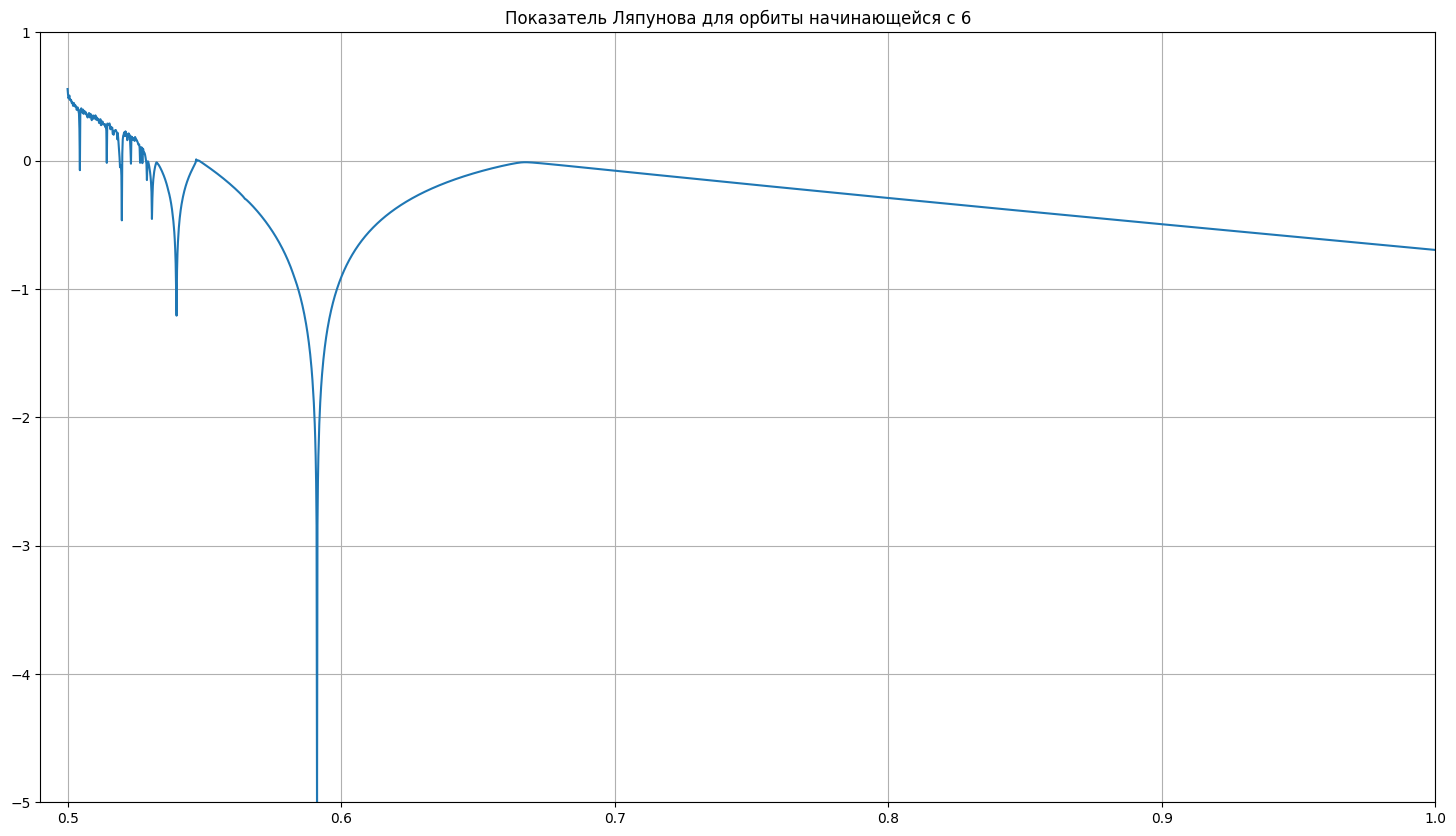

In [ ]:
def f_x(x, r):
  return r**0.5 * (1/(x-2)**0.5 - 0.5 * x / (x-2)**1.5)

r = np.linspace(0.5, 1, n_r)
x0 = 6
l = np.zeros_like(r)
for i, r_ in enumerate(r):
  temp = 0
  xn = x0
  for j in range(500):
    temp += np.log(np.abs(f_x(xn, r_)))
    xn = f(xn, r_)
  l[i] = 1/500 * temp

plt.figure(figsize=(18, 10))
plt.grid(True)
plt.title('Показатель Ляпунова для орбиты начинающейся с 6')
plt.axis([0.49, 1, -5, 1])
plt.plot(r, l)

In [ ]:
def drawLamerey(r, x0, n, x_min = 2, x_max = 10, y_min = 0, y_max = 10):
  n_x=1000
  x = np.linspace(2.01, 20, n_x)
  f_values = f(x, r)
  plt.figure(figsize=(10, 10))
  plt.title("Lamerey diagram for r = {}, x0 = {}".format(r, x0))
  plt.axis([x_min, x_max, y_min, y_max])
  plt.plot(x, x, color='green')
  plt.plot(x, f_values, color='blue')
  xi = x0
  plt.plot([xi, xi], [0, f(xi, r)], 'r-', linewidth=0.5)
  for i in range(n):
    x_next = f(xi, r)
    plt.plot([xi, x_next], [x_next, x_next], 'r-', linewidth=0.5)
    plt.plot([x_next, x_next], [x_next, f(x_next, r)], 'r-', linewidth=0.5)
    xi = x_next

Для $r > \frac{2}{3}$ последовательность, как и ожидалось, довольно быстро сходится к стационарной точке.

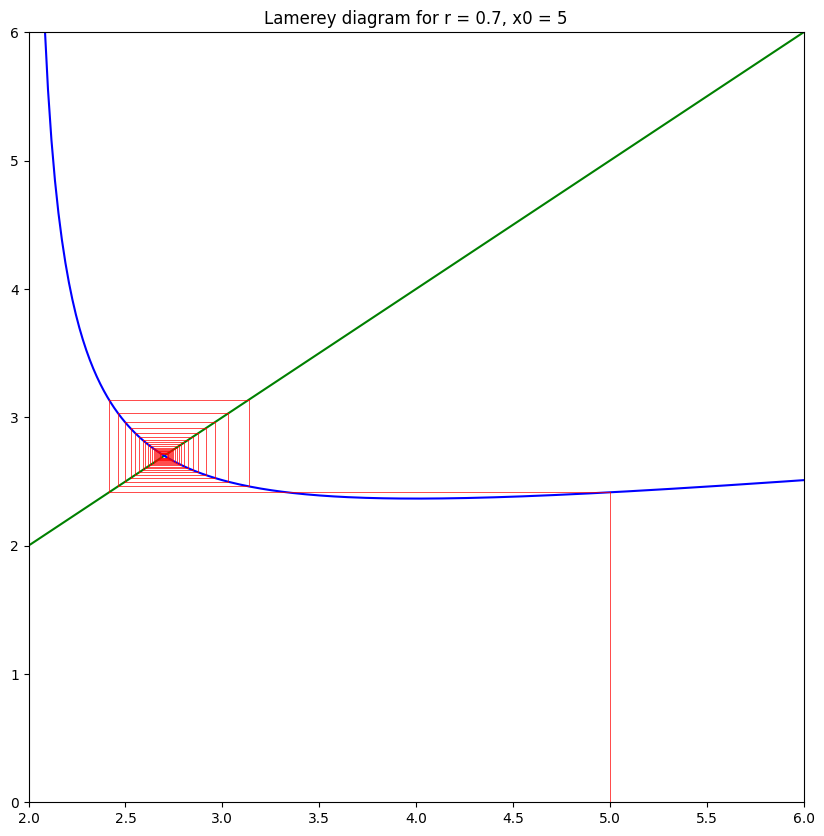

In [ ]:
drawLamerey(0.7, 5, 40, 2, 6, 0, 6)

При значении $r = 0.595$ видим уход в цикл из 2 точек.

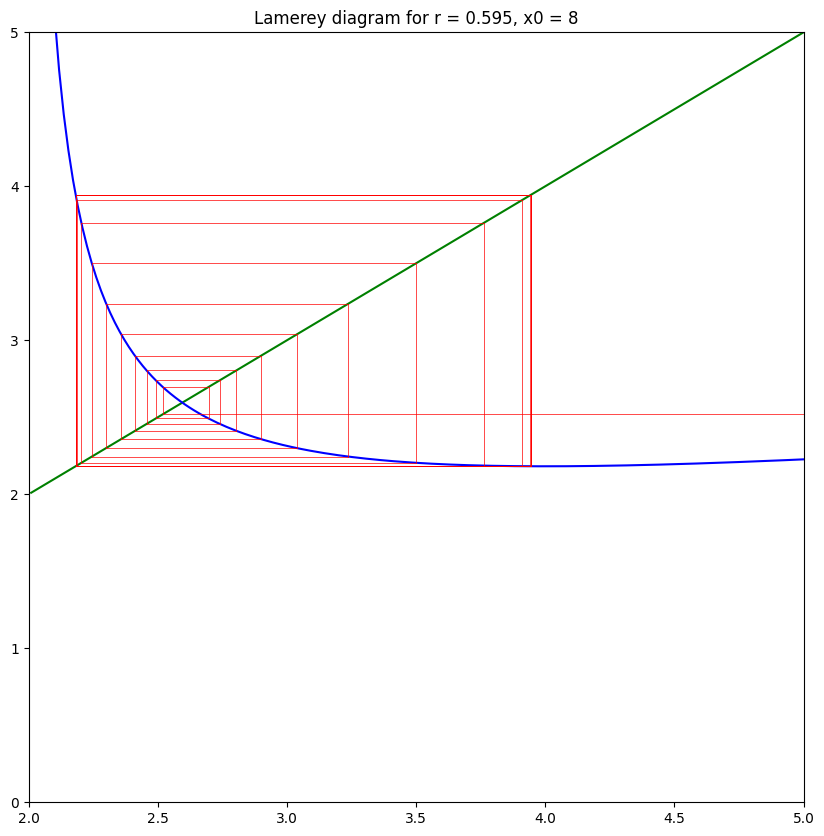

In [ ]:
drawLamerey(0.595, 8, 1000, 2, 5, 0, 5)

Ради интереса рассмотрим точку $r=\frac{2}{3}$

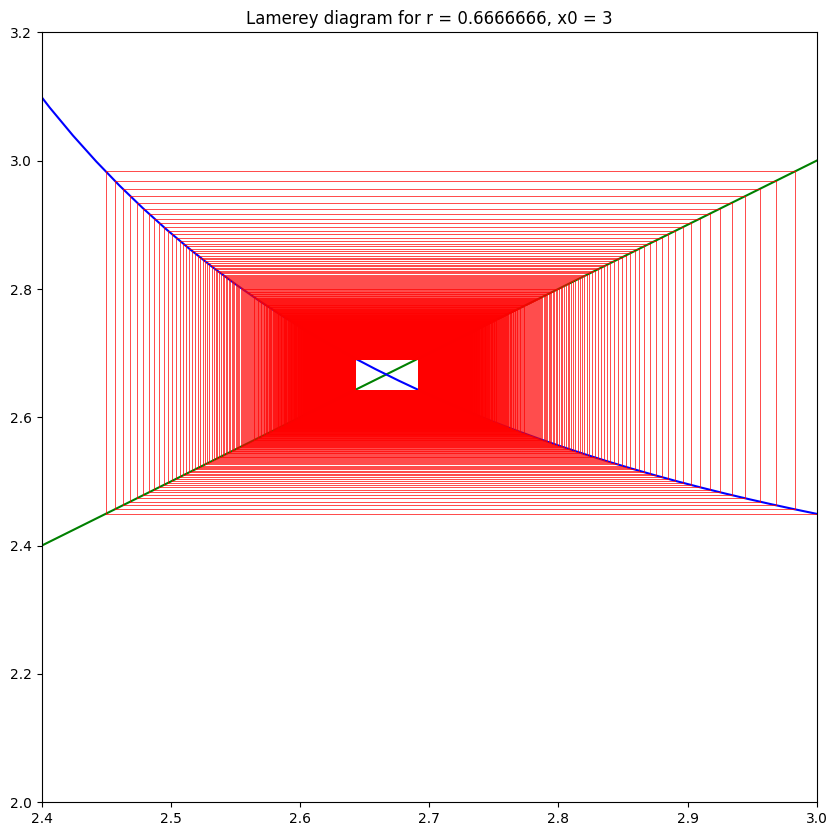

In [ ]:
drawLamerey(0.6666666, 3, 3000, 2.4, 3, 2, 3.2)

Рассмотрим точку $r = 0.53$, где должен быть цикл из 4 точек.

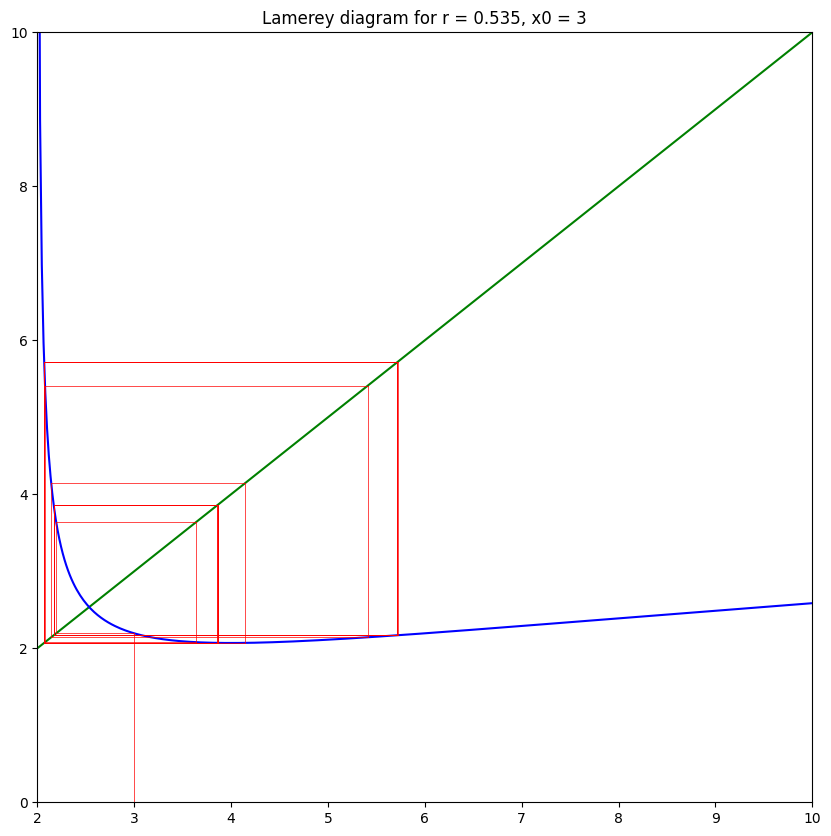

In [ ]:
drawLamerey(0.535, 3, 50)

Следующие 2 графика показывают, насколько сильно меняется картинка при изменении параметра всего на 0.001

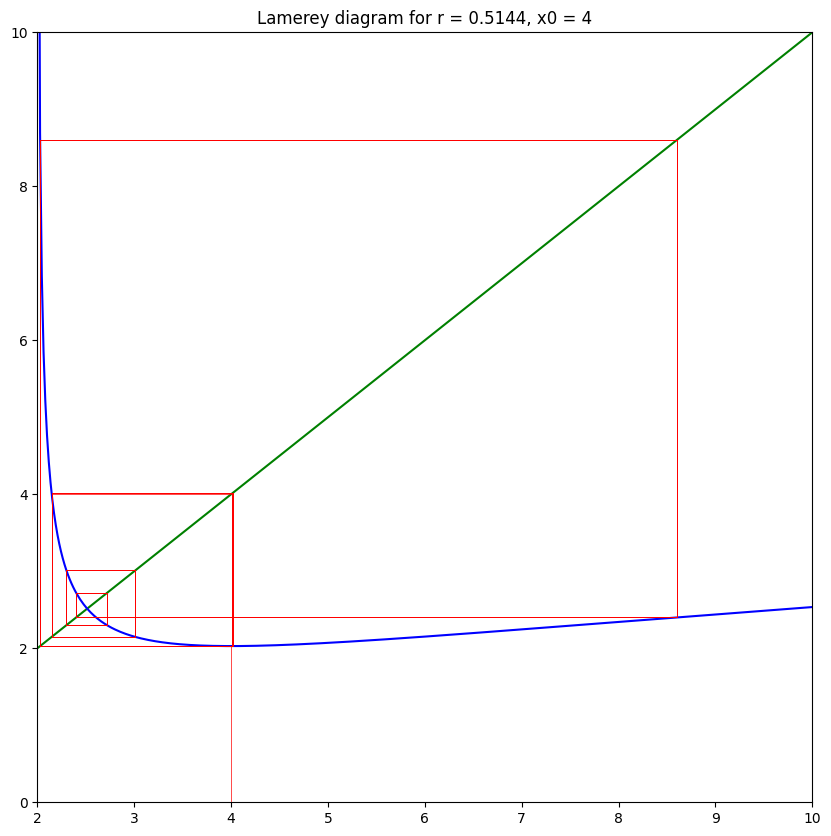

In [ ]:
drawLamerey(0.5144, 4, 100)

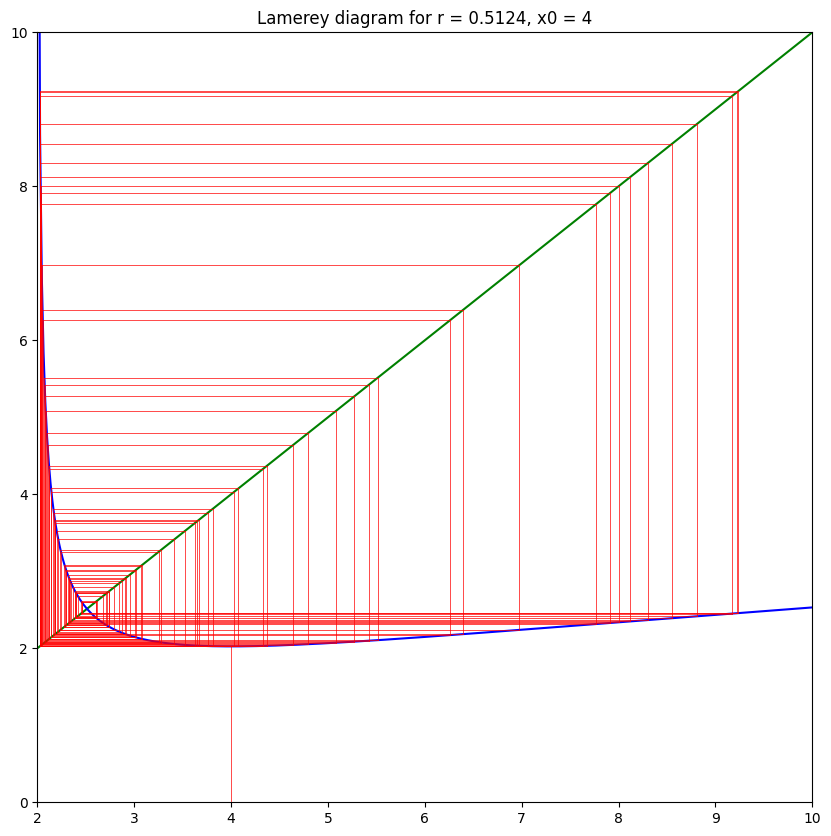

In [ ]:
drawLamerey(0.5124, 4, 100)